In [ ]:
#EECE 490 Hw7 : K-means
#Eliya Badr, Abed Kobeissy, Karim Fayad
#Note : The comments were done by us first to help us think (Thinking out loud helps), and to clarify what we are doing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EECE490/Mall_Customers.csv')
df.head()
print(df.head())
df.shape
#Ok so our data has 200 rows and 5 columns

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


(200, 5)

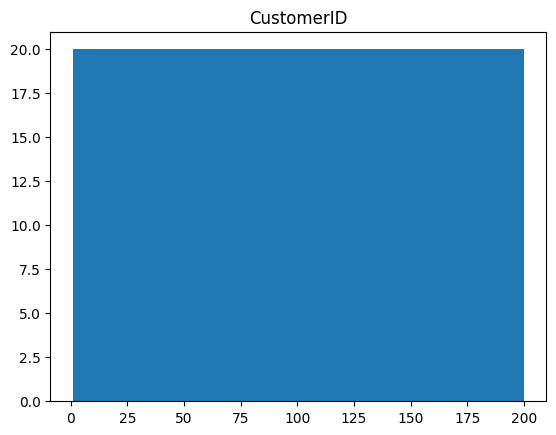

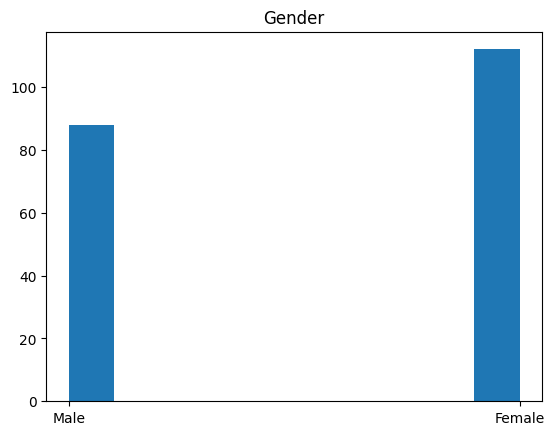

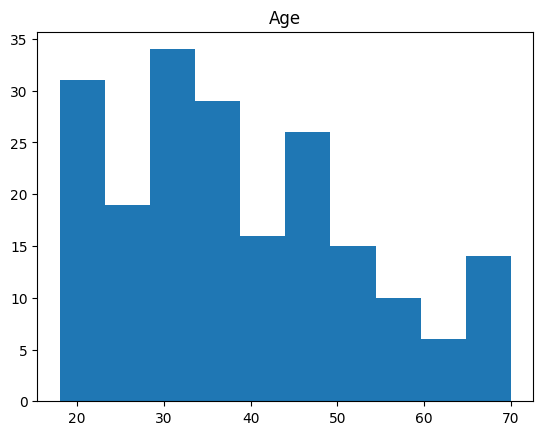

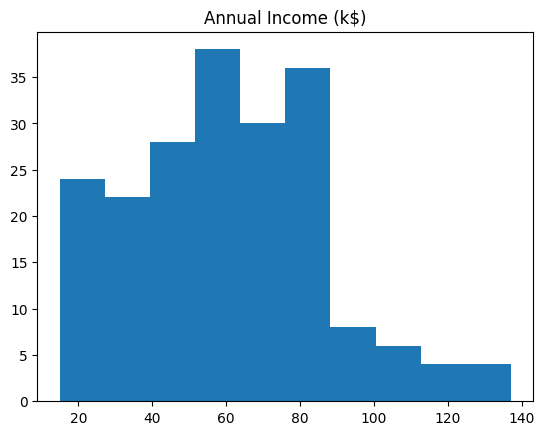

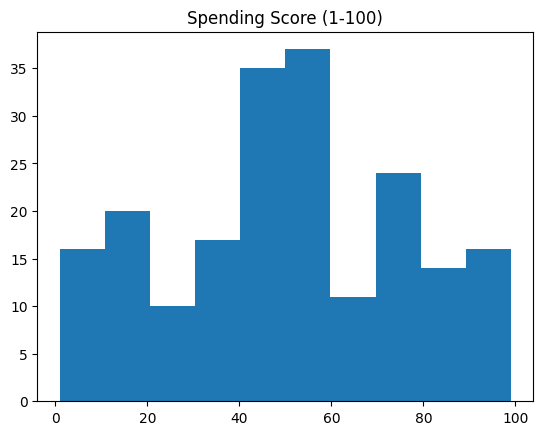

In [ ]:
#Let's see what our data looks like
for col in df.columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

  #We can drop CustomerID because it's unique and useless for our analysis

In [ ]:
df.drop(['CustomerID'] , axis=1, inplace=True)
df.head()
#Ok now it's removed

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
print(df.head())
#Standarize values

stand = StandardScaler()
df_scaled = stand.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled)

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40
       Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    1.128152 -1.424569           -1.738999               -0.434801
1    1.128152 -1.281035           -1.738999                1.195704
2   -0.886405 -1.352802           -1.700830               -1.715913
3   -0.886405 -1.137502           -1.700830                1.040418
4   -0.886405 -0.563369           -1.662660               -0.395980
..        ...       ...                 ...                     ...
195 -0.886405 -0.276302            2.268791                1.118061
196 -0.886405  0.441365            2.497807               -0.861839
197  1.128152 -0.491602           

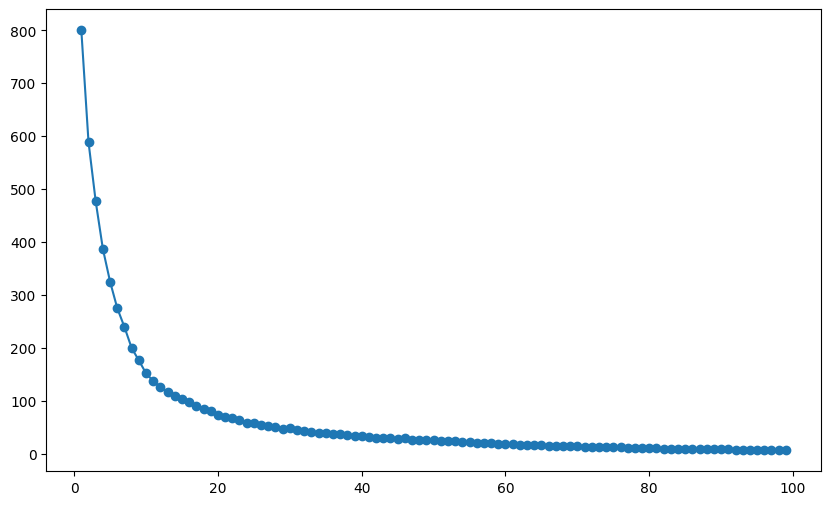

In [ ]:
#Now we start clustering
Kmax = 100 #Run for multiple Ks to see what's the best.
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=0) for i in range(1, Kmax)] #We used n_init here to run multiple times and choose the  best, to avoid errors from random initial centroids.
error = [kmeans[i].fit(df_scaled).inertia_ for i in range(len(kmeans))]
k_range = np.arange(1,Kmax,1)
plt.figure(figsize=(10,6))
plt.plot(k_range, error, marker='o')
plt.show()

#The 'elbow method' gives us k around 10
#Choose k = 10 as our best number of clusters

In [ ]:
k = 10 #We will proceed with 10
kmean_clusters = KMeans(n_clusters=k, n_init=10, random_state=0)
kmean_clusters.fit(df_scaled)


KMeans(n_clusters=10, n_init=10, random_state=0)

In [ ]:
kmean_clusters.predict(df_scaled)
#Let's check silouhette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, kmean_clusters.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.42076374869477745


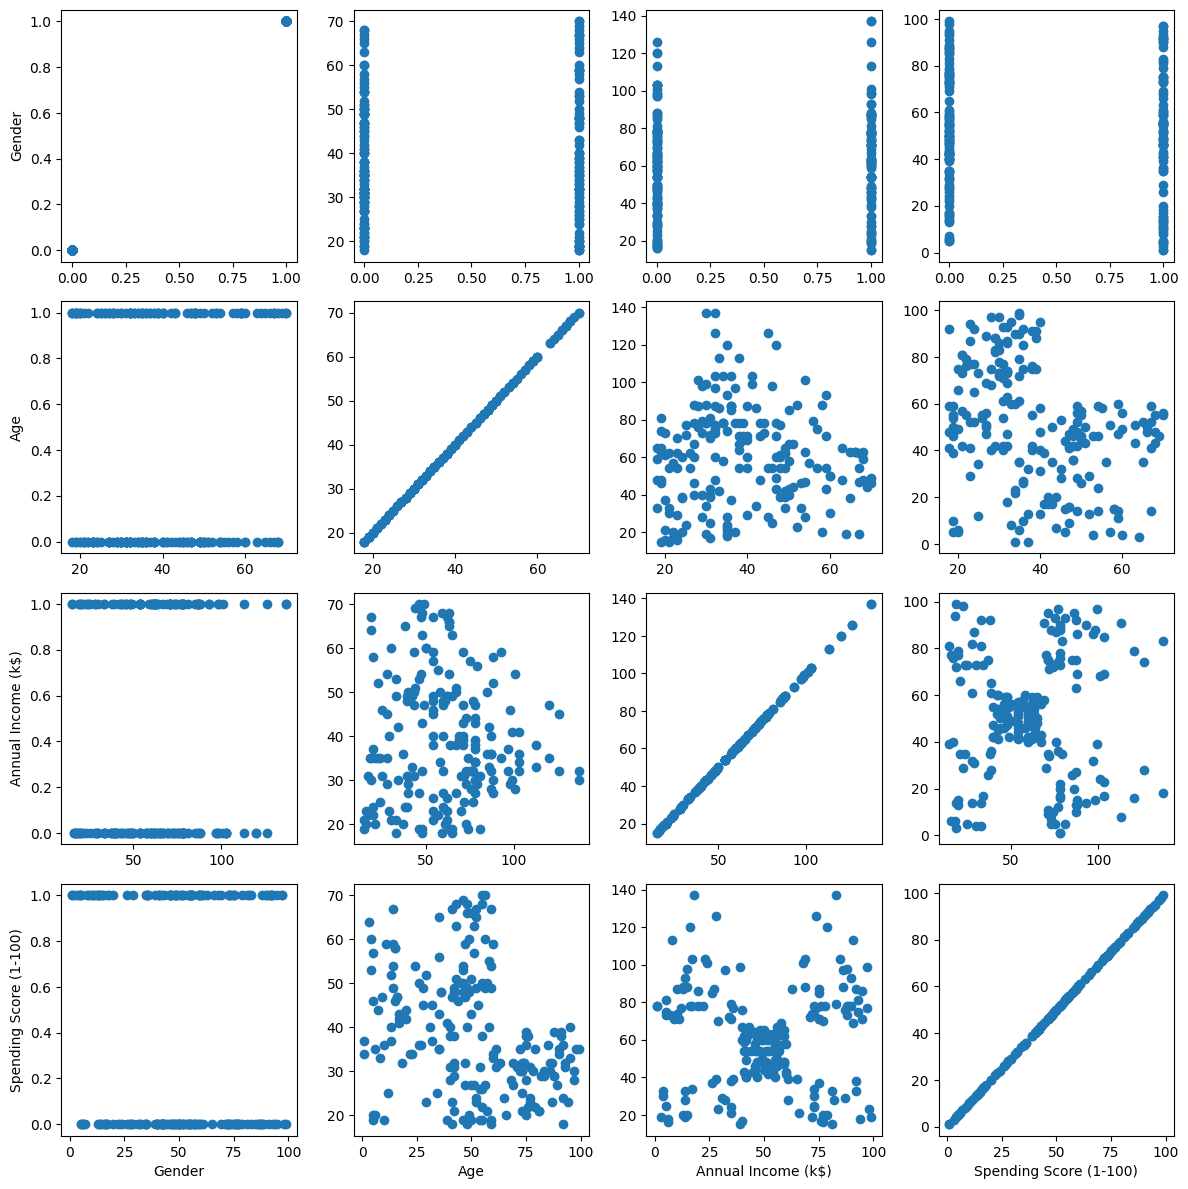

In [34]:

# Get the number of features
num_features = len(df.columns)

# Create a figure and subplots
fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))

# Loop through all feature combinations
for i in range(num_features):
    for j in range(num_features):
        # Scatter plot for features i and j
        axes[i, j].scatter(df.iloc[:, i], df.iloc[:, j])

        # Set axis labels
        if i == num_features - 1:
            axes[i, j].set_xlabel(df.columns[j])
        if j == 0:
            axes[i, j].set_ylabel(df.columns[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#The above scatters are messy --> cannot cluster with 4 features (unless we can invent 4D plotting during this homework).
#After some research, we need PCA to reduce dimensions
#and redo on 2 dimensions

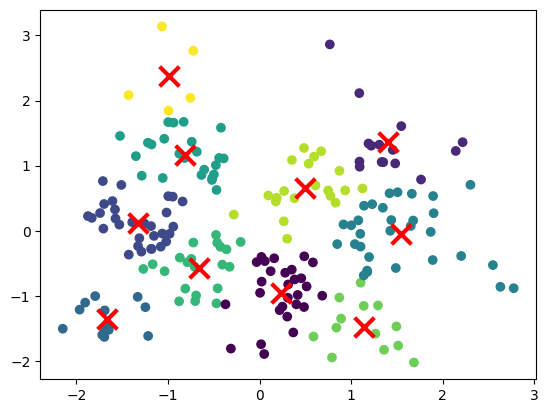

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(df_scaled)



# Apply KMeans to the reduced data
kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=0)
kmeans_pca.fit(df_pca)

centroids_pca = kmeans_pca.cluster_centers_

# Visualize clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_pca.labels_) # Existing scatter plot
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, linewidths=3, color='r') # Plot centroids
plt.show()

In [36]:
#Get Scores:
from sklearn.metrics import  calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(df_pca, kmeans_pca.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3705231268562711


# Some Analysis:
##-First we did normal KMeansfound best k using elbow method
## -got silouhette score like the LAB
## -4 dimensions --> hard to get something meaningful
## Do PCA to get two dimensions
## Plot the clusters
## We can see the 10 clusters
## We successfully clustered the customers, based on uncorrelated features, and were able to group them.